<a href="https://colab.research.google.com/github/patricksabry/UTS_ML2019_ID98106545/blob/master/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review on RUM86 - LEARNING INTERNAL REPRESENTATIONS BY ERROR PROPAGATION

# Introduction

The following paper is a a critique on the seminal research work conducted by Hinton et al in 1985 on error propagation in artifical neural networks. The paper serves to expound the group's efforts in identifying the success of using back propagation to promote self learning internal representations in deep neural networks. The group's early work on generalised error minimization techniques paved the way for advancements in deep neural networks as we know it today. This paper explores these techniques in detail and reinforces them with tangible examples using current technologies.

# Content 

In the realm of machine learning the solution domain has been well understood for simple two layer associative networks for quite some time. Such networks allow an input layer of data to be directly mapped to a set of output patterns, meaning there is no internal (hidden) representation to be interpreted. Despite generalising output patterns reasonably, these simple networks are beholden to the rules encoded into the input data by external forces and as such are unable to learn unorthodox mappings from input to output without hidden units. The main challenge at the time of publishing the paper was the inability to confidently traverse the error space of feedforward networks with semilinear units. The paper in turn proposes a generalised gradient descent method for solving weights in such non-linear networks whilst overcoming the local minima problem.

The generalised delta rule is defined in the paper as

$\Delta$p$w_{ji}$ = $\eta$($t_{pj}$ - $o_{pj}$) $i_{pi}$

Whereby for a given input/output pair $p$,

* $t_{pj}$ is the target input for the $j^{th}$ component of the output pattern $p$.
* $o_{pj}$ is the $j^{th}$ element of the actual output pattern produced by input pattern $p$.
* $i_{pi}$ is the value of the $i^{th}$ element of the input pattern

The paper stipulates that the generalised delta rule is exercised in two phases. In the first phase the input pattern is presented and propagated forward through the network to generate an internal representation of output patterns to be compared to the target output patterns. The 'target' output patterns in this context would be the dependent variable(s) defined in the training dataset. Unit weights are also initialised randomly in this phase.

Subsequently, the second phase involves a backward pass through the network starting from the output layer. The formula used to determine the error signal $\delta$ for any given unit in the network is contingent on whether the unit is an output unit or not:

* $\delta$$_{output}$ = ($t_{pj}$ - $o_{pj}$)$f'$$_j$($net_{pj}$)
* $\delta$$_{other}$ = $f'$$_j$($net_{pj}$)$\sum_k$$\delta$$_{pk}$$w_{kj}$

Determing the error signals for the output layer allows for the subsequent computation of optimal weight changes for all connections that feed into the output layer such that the weight change $\Delta$p$w_{ji}$ should be proportional to the product of $\delta_{pj}$ and the output $o_{pi}$ of the unit sending activation along that line.

The above process of error signal determination and weight adjustment is 'back propagated' and repeated for the penultimate layer in the network, followed by all other layers in the network until the input layer is reached. This would ultimately be considered the completion of one iterration in the back propagation training process, and the number of iterations needed to reach a global minima is contingent on hyperparameters such as the learning rate, momentum and weight decay.

The paper explores in detail the capacity for the back propagation process to solve more complicated problems such as the XOR and parity problems. Such problems were previously unsolvable using traditional gradient descent due to linear function limitations in solving non-linear equations. The authors showcase with empirical evidence how such problems can be solved through the learning of internal representations using back propagation in deep neural networks.


# Innovation

Although not the first to propose the use of backpropagation to train neural networks, Hinton et al's paper published in 1985 played an integral role in popularizing the use of back propagation to train multi-layer neural networks reliably. The novelty of the paper was ultimately its ability to bridge the knowledge gap between training simple two-layer networks and multi-layer networks. This was done by proving that loss function error could be minimised using back propagation even in deeper neural network architectures with semilinear activation units. This was a first for the time and was empirically proven through showcasing the power of back propagating error signals from the output layer back down through the hidden layers to solve previously unsolvable problems due to linear activation limitations. The problems proofed in the paper include the XOR, parity and encoding problems, all of which showcase the

The research area focuses on extending the detla rule for non-linear activation functions in feedforward neural networks and proposes how to do so using backpropagation. The main problem with standard detla rule was its inability to confidently compute error derivatives in non convex error space. Convoluted error spaces are common in deep neural networks loss functions compared to two layer networks which typically have a simpler convex representation in error space. As seen in **figure 1**, a simple two-layer network without an activation function or bias is trained to approximate class targets $t$ in respect to $y$ by minimizing the squared error between target and output. This is a good example of the delta rule guarranteeing reaching the global minima of the loss function due to the input vector's direct access to the output vector in the absence of hidden layers. 

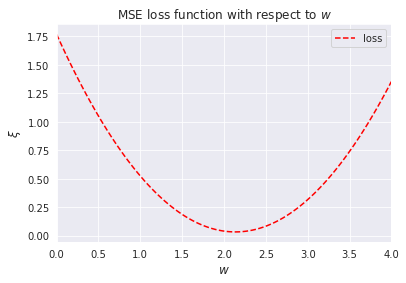

In [0]:
#@title Figure 1 - linear two-layer cost function
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics

def f(X):
    return X * 2
    
def sample_net(X, w):
    #Output vector generator
    return X * w

def loss(y, t):
    # MSE loss function
    return np.mean((t-y)**2)

# Initialise random uniform dummy data & gaussian variables
X = np.random.uniform(0, 1, 20)
noise_variance = 0.2  # Variance of the gaussian noise
noise = np.random.randn(X.shape[0]) * noise_variance # Gaussian noise error for each sample in X
# Create targets t
t = f(X) + noise

# Plotting loss against the weights in the sample NN
weight_space = np.linspace(0,4, num=100)

# Compute loss for each weight in the weight space
weight_space_loss = np.vectorize(lambda w: loss(sample_net(X,w), t))(weight_space)

# Plot the loss against each weight
#plt.style.use(['dark_background'])
plt.plot(weight_space, weight_space_loss, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('MSE loss function with respect to $w$')
plt.xlim(0, 4)
plt.legend()
plt.show()

**Source**: Peter Roelants, https://peterroelants.github.io/posts/neural-network-implementation-part01/

The novelty of the generalised delta rule is most emphatic in the second phase of the rule, which is back propagation. The generalised delta rule is defined in the paper as

$\Delta$p$w_{ji}$ = $\eta$($t_{pj}$ - $o_{pj}$) $i_{pi}$ = $\eta$$\delta_{pj}$$i_{pi}$

Whereby for a given input/output pair $p$,

* $t_{pj}$ is the target input for the $j^{th}$ component of the output pattern $p$.
* $o_{pj}$ is the $j^{th}$ element of the actual output pattern produced by input pattern $p$.
* $i_{pi}$ is the value of the $i^{th}$ element of the input pattern

The generalised delta rule solves the problem of local minima in a wide variety of arbitrary networks where the standard delta rule would otherwise fail due to non linear error surfaces. It does so by back-propagating error signals starting from the output layer and working backwards layer by layer to recursively compute the error signal $\delta$ in each layer of the network.

This is highlighted in **figure 2** below, which shows the loss function surface of a feed forward neural network with a single hidden layer. This toy neural network utilized a non-linear activation function (RBF) and a binary cross-entropy loss function. Accordingly, the error surface of the loss function is not strictly concave upwards, and as such is prone to the issue of local minima when using the traditional gradient descent rule.

---



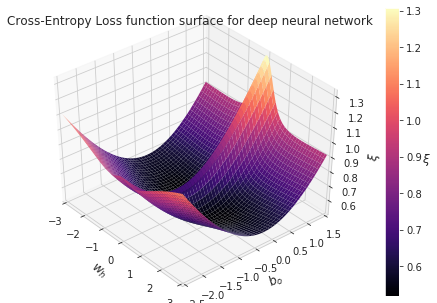

In [0]:
#@title Figure 2 - Error space for non-linear activation function (RBF)
import sys
import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
from matplotlib import cm # Colormaps
from matplotlib.colors import colorConverter, ListedColormap
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
import seaborn as sns  # Fancier plots

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=4)

# Define and generate the samples
nb_of_samples_per_class = 20  # The number of sample in each class
blue_mean = 0  # The mean of the blue class
red_left_mean = -2  # The mean of the red class
red_right_mean = 2  # The mean of the red class

std_dev = 0.5  # standard deviation of both classes
# Generate samples from both classes
xs_blue = np.random.randn(
    nb_of_samples_per_class, 1) * std_dev + blue_mean
xs_red = np.vstack((
    np.random.randn(  # Red star left samples
        nb_of_samples_per_class//2, 1) * std_dev + red_left_mean,
    np.random.randn(  # Red star right samples
        nb_of_samples_per_class//2, 1) * std_dev + red_right_mean
))

# Merge samples in set of input variables x, and corresponding set of
# output variables t
x = np.vstack((xs_blue, xs_red))
t = np.vstack((np.ones((xs_blue.shape[0], 1)), 
               np.zeros((xs_red.shape[0], 1))))


def logistic(zo):
    """Logistic classifiction function"""
    return 1. / (1. + np.exp(-zo))


def hidden_activations(x, wh):
    """Hidden layer activations from RBF."""
    return rbf(x * wh)


def output_activations(h , bo):
    """Logistic classification output."""
    return logistic(h + bo)

def rbf(zh):
    """RBF activation function"""
    return np.exp(-zh**2)

def nn(x, wh, bo):
    """Full neural network function."""
    return output_activations(hidden_activations(x, wh), bo)

def nn_predict(x, wh, bo):
    """Neural network prediction function that only returns
    1 or 0 depending on the predicted class."""
    return np.around(nn(x, wh, bo))

def loss(y, t):
    """Cross entropy loss function."""
    return -np.mean(
        (t * np.log(y)) + ((1-t) * np.log(1-y)))

def loss_for_param(x, wh, bo, t):
    """Calculate the loss for a given set of parameters."""
    return loss(nn(x, wh, bo) , t)


# Plot the loss in function of the weights
# Define a vector of weights for which we want to plot the loss
grid_size = 200 # Grid used to plot loss surface
wsh = np.linspace(-3, 3, num=grid_size) # hidden weights
bso = np.linspace(-2.5, 1.5, num=grid_size) # output weights
params_x, params_y = np.meshgrid(wsh, bso) # generate grid
# Initialise loss surface grid
loss_grid = np.zeros((grid_size, grid_size))
# Fill the loss matrix for each combination of weights
for i in range(grid_size):
    for j in range(grid_size):
        loss_grid[i,j] = loss(
            nn(x, params_x[i,j], params_y[i,j]) , t)
# Plot the loss function surface
fig = plt.figure(figsize=(6, 4))
with sns.axes_style("whitegrid"):
    ax = Axes3D(fig)
# plot the surface
surf = ax.plot_surface(
    params_x, params_y, loss_grid, linewidth=0, cmap=cm.magma)
ax.view_init(elev=40, azim=-40)
cbar = fig.colorbar(surf)
ax.set_xlabel('$w_h$', fontsize=12)
ax.set_ylabel('$b_o$', fontsize=12)
ax.set_zlabel('$\\xi$', fontsize=12)
ax.set_ylim(-2.5, 1.5)
ax.set_xlim(-3, 3)
cbar.ax.set_ylabel('$\\xi$', fontsize=12, rotation=0)
plt.title('Cross-Entropy Loss function surface for deep neural network')
plt.show()
#

**Source**: Peter Roelants, https://peterroelants.github.io/posts/neural-network-implementation-part03/

The proofing of the generalised delta rule in this paper was imperative to the drastic advancements in deep neural network architectures in the subsequent years. The success of all deep neural networks is heavily predicated on the power and reliability of generalised gradient descent algorithms in conjunction with back propagation. At the time of publishing this article people understood

# Technical Quality

* How would you rate the technical quality of the work in the paper? Here you should consider the quality of the work done. The authors supported their theory using...




# Application and X-factor

Do you think the application domain is appropriate for the proposed technique? What other
application domains could the research work be applied? Also in this section, give a couple of suggestions for further
developments of the research work. Do you think the work described in the paper could spark a good discussion in
class? What did you find interesting about the work? 


Application domain:


Further developments of research work:


# Presentation

The overall structure of the paper is clear. It is easy to read as sentence syntax is clear and paragraphs are cohesive. Contributions are outlined clearly and are reinforced by clever use of figures and tables. These tables and figures help illustrate the complicated concepts being discussed and greatly assists with information digestion. I appreciated the italicizing of tedious formulaic proofing sections as a means of abstraction for not only readers who don't understand what the derivations mean, but also for advanced academic readers who want to spare the tediom. On this notion, for formulaic representations that were imperative to the theoretical contribution of the paper, the authors broke down complicated formulas and defined their constituent symbols in layman terms which makes this paper extremely attractive to academics of all levels to confidently digest the information presented. Despite this, there were some cases where complicated formulas where presented and the notations within them were not explained. The paper could have been more attractive to less experienced academics such as myself if the authors had included a summary of notations section in the appendix to define notation meanings.

# References 

list of references used in this paper.

* https://peterroelants.github.io/posts/neural-network-implementation-part01/
* https://peterroelants.github.io/posts/neural-network-implementation-part02/
* RUM86 
* https://blog.goodaudience.com/creating-a-perceptron-from-scratch-9de028088fbe
* https://www.cse.unsw.edu.au/~cs9417ml/MLP2/BackPropagation.html